Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from scipy.stats import boxcox
from scipy import stats
from sklearn.preprocessing import  MinMaxScaler

Load dataset and concantinate dataset as one csv file

In [4]:
# Specify the folder containing the CSV files
folder_path = 'bidmc_csv'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_data = pd.DataFrame()

# Iterate over the CSV files and concatenate them
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    concatenated_data = pd.concat([concatenated_data, data])

# Save the concatenated data to a new CSV file
concatenated_data.to_csv('concatenated_dataset.csv', index=False)

Data visualization 

In [5]:
dataset = pd.read_csv('concatenated_dataset.csv')

print(dataset.describe())

pd.set_option("display.max.columns", None)
dataset.head()

           Time [s]            HR         PULSE          RESP          SpO2
count  24531.000000  24527.000000  24403.000000  24378.000000  24403.000000
mean     239.980392     89.253190     88.584723     17.401674     96.613162
std      138.855339     13.517618     14.014707      3.460588      3.317676
min       -1.000000     44.000000     37.000000      0.000000     83.000000
25%      120.000000     81.000000     80.000000     16.000000     95.000000
50%      240.000000     89.000000     88.000000     18.000000     97.000000
75%      360.000000     95.000000     95.000000     19.000000     99.000000
max      480.000000    139.000000    129.000000     34.000000    100.000000


,Time [s],HR,PULSE,RESP,SpO2
0,0,94.0,93.0,25.0,97.0
1,1,94.0,93.0,25.0,97.0
2,2,94.0,93.0,25.0,97.0
3,3,92.0,93.0,26.0,97.0
4,4,93.0,93.0,26.0,97.0


Evaluating dataset

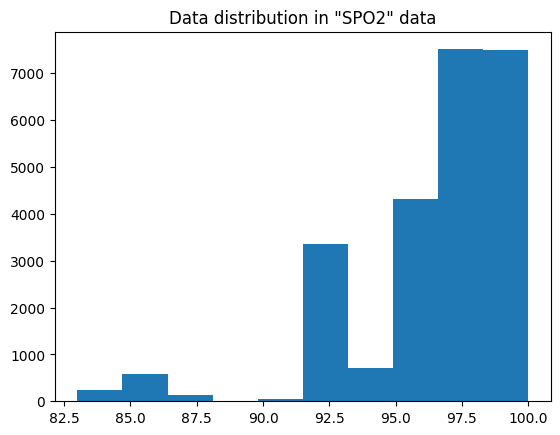

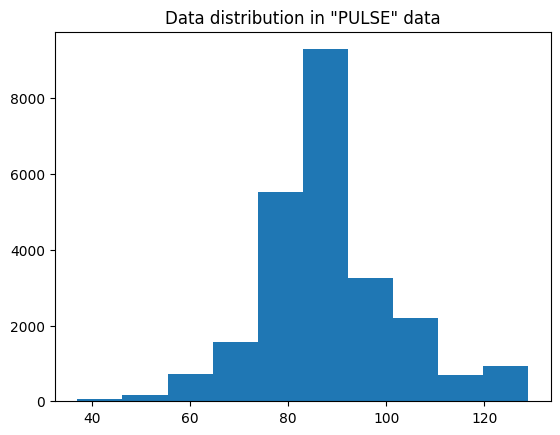

In [6]:
# Histogram graph
plt.title('Data distribution in "SPO2" data') 
x = dataset[' SpO2']
plt.hist(x)
plt.show() 

plt.title('Data distribution in "PULSE" data') 
x = dataset[' PULSE']
plt.hist(x)
plt.show() 

Removing noises 

In [7]:
column_to_delete = ['Time [s]', ' HR', ' RESP']

dataset = dataset.drop(column_to_delete, axis=1)

# Display the modified DataFrame
print("\nModified DataFrame:")
print(dataset)


Modified DataFrame:
        PULSE   SpO2
0        93.0   97.0
1        93.0   97.0
2        93.0   97.0
3        93.0   97.0
4        93.0   97.0
...       ...    ...
24526   116.0   93.0
24527   116.0   93.0
24528   117.0   93.0
24529   117.0   93.0
24530   117.0   93.0

[24531 rows x 2 columns]


Remove NA values

In [8]:

missing_values = dataset.isna()

# Count the missing values in each column
missing_counts = missing_values.sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values.iloc[3:])

Columns with missing values:
        PULSE   SpO2
3       False  False
4       False  False
5       False  False
6       False  False
7       False  False
...       ...    ...
24526   False  False
24527   False  False
24528   False  False
24529   False  False
24530   False  False

[24528 rows x 2 columns]


In [9]:
# Remove columns with missing values
clean_data = dataset.dropna()

# Print the cleaned DataFrame
print(clean_data)

        PULSE   SpO2
0        93.0   97.0
1        93.0   97.0
2        93.0   97.0
3        93.0   97.0
4        93.0   97.0
...       ...    ...
24526   116.0   93.0
24527   116.0   93.0
24528   117.0   93.0
24529   117.0   93.0
24530   117.0   93.0

[24403 rows x 2 columns]


Removing duplication

In [10]:
df_unique = clean_data.drop_duplicates()

'''print("Original DataFrame:")
print(clean_data)'''

print("\nDataFrame with duplicates removed:")
print(df_unique)


DataFrame with duplicates removed:
        PULSE   SpO2
0        93.0   97.0
6        94.0   97.0
26       94.0   98.0
44       92.0   97.0
61       91.0   97.0
...       ...    ...
24408   116.0   94.0
24410   117.0   94.0
24415   117.0   95.0
24416   116.0   95.0
24469   117.0   93.0

[491 rows x 2 columns]


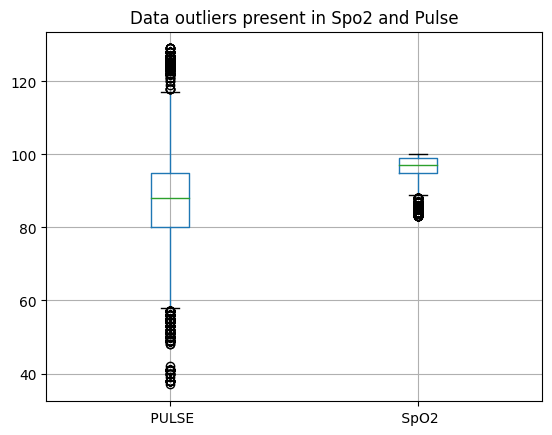

In [14]:
#Box plot to show the numeric value difference between oxygen level and heart rate
plt.title('Data outliers present in Spo2 and Pulse') 

boxplot = dataset.boxplot()

# Show the plot
plt.show()


Removing outliers

In [ ]:
z_scores = np.abs(stats.zscore(df_unique[" PULSE"]))

# Define a threshold for outlier detection
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the data
pulse_no_outliers = df_unique[np.logical_not(np.isin(np.arange(len(df_unique[" PULSE"])), outlier_indices))]

z_scores = np.abs(stats.zscore(pulse_no_outliers[" SpO2"]))

# Define a threshold for outlier detection
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the data
data_no_outliers = pulse_no_outliers[np.logical_not(np.isin(np.arange(len(pulse_no_outliers[" SpO2"])), outlier_indices))]

# Print the original data and data without outliers
print("Data without Outliers:", data_no_outliers)

NameError: name 'data_no_outliers' is not defined

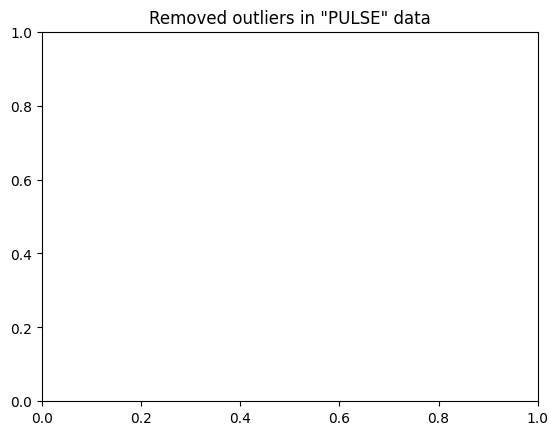

In [15]:
# Histogram graph
plt.title('Removed outliers in "PULSE" data') 
x = data_no_outliers[' PULSE']
plt.hist(x)
plt.show() 

plt.title('Removed outliers in "SpO2" data') 
x = data_no_outliers[' SpO2']
plt.hist(x)
plt.show() 

Adding "healthy heart" as a target column based on pulse rate

In [17]:
# Add a new column named "target" using the function


clean_data[' HEALTHY HEART'] = 0

for index, row in clean_data.iterrows():    
    if row[' PULSE'] < 100 and row[' PULSE'] > 50:
        if row[' SpO2'] > 90:
            print(row[' PULSE'], row[' SpO2'])
            print("Heart healthy")
            clean_data.at[index, ' HEALTHY HEART'] = 1

        else: 
            clean_data.at[index, ' HEALTHY HEART'] = 0
    else:
        clean_data.at[index, ' HEALTHY HEART'] = 0
        print(row[' PULSE'])
        print("Heart unhealthy")
        


# Display the updated DataFrame
print(clean_data)
clean_data.to_csv('Training_heart.csv', index=False)



C:\Users\jessl\AppData\Local\Temp\ipykernel_24292\131199445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[' HEALTHY HEART'] = 0


93.0 97.0
Heart healthy
93.0 97.0
Heart healthy
93.0 97.0
Heart healthy
93.0 97.0
Heart healthy
93.0 97.0
Heart healthy
93.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 98.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
94.0 97.0
Heart healthy
93.0 97.0
Heart 

Distribution of healthy and unhealthy heart

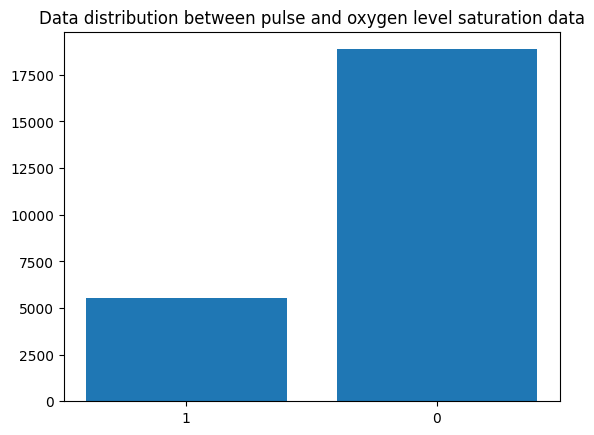

In [18]:
# bar graph
plt.title('Data distribution between pulse and oxygen level saturation data') 
target_counts = clean_data[' HEALTHY HEART'].value_counts()
x = clean_data[' HEALTHY HEART']
plt.bar(target_counts.index, target_counts.values)
plt.xticks(target_counts.index, ['0', '1']) 
plt.show() 

Removing skewness and kurtosis

In [ ]:
selected_features = [' PULSE', ' SpO2']

# Calculate the skewness and kurtosis of the original data
original_skewness = data_no_outliers[selected_features].skew()
original_kurtosis = data_no_outliers[selected_features].kurtosis()

# Apply Box-Cox transformation to selected features
transformed_features = pd.DataFrame()
for feature in selected_features:
    transformed_feature, _ = boxcox(data_no_outliers[feature])
    transformed_features[feature] = transformed_feature


# Calculate the skewness and kurtosis of the transformed data

transformed_skewness = transformed_features.skew()
transformed_kurtosis = transformed_features.kurtosis()
transformed_sqrt = np.sqrt(transformed_features)


print("Original Skewness:")
print(original_skewness)
print("\nOriginal Kurtosis:")
print(original_kurtosis)
print("\nTransformed Skewness:")
print(transformed_skewness)
print("\nTransformed Kurtosis:")
print(transformed_kurtosis)
print("\nTransformed Square root:")
print(transformed_sqrt)

In [ ]:
plt.title('Removed Skewness and Kurtosis in "PULSE"') 
x = transformed_features[" PULSE"]
plt.hist(x)
plt.show() 

plt.title('Removed Skewness and Kurtosis in "SpO2"') 
x = transformed_features[" SpO2"]
plt.hist(x)
plt.show() 

Normalize a dataset  using MinandMaxSCaler 

In [ ]:
scaler = MinMaxScaler()

selected_features = [' PULSE', ' SpO2']
# Apply Min-Max scaling to selected features
clean_data[selected_features] = scaler.fit_transform(clean_data[selected_features])

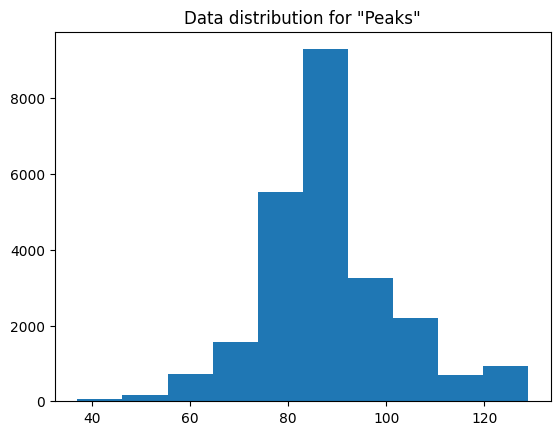

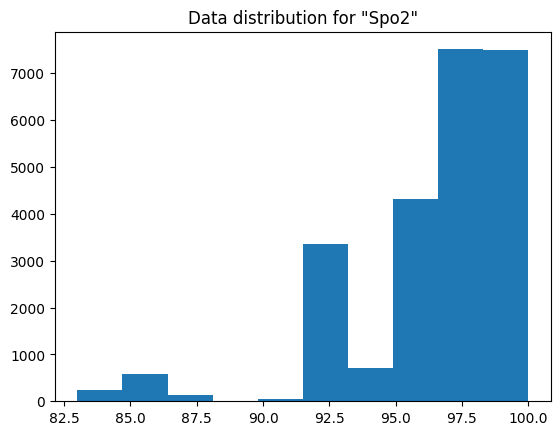

In [32]:
plt.title('Data distribution for "Peaks"') 
x = clean_data[" PULSE"]
plt.hist(x)
plt.show() 

plt.title('Data distribution for "Spo2"') 
x = clean_data[" SpO2"]
plt.hist(x)
plt.show() 

Text(0, 0.5, 'Pulse rate')

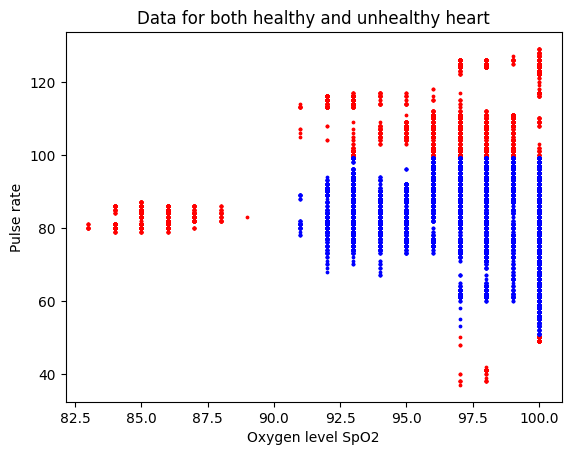

In [19]:

x1 = clean_data[" SpO2"]
x2 = clean_data[" PULSE"]
y = clean_data[" HEALTHY HEART"]
c = ['r' if heart_condition== 1 else 'b' for heart_condition in clean_data[" HEALTHY HEART"]]

plt.scatter(x1[y==0], x2[y==0], s=3, c='r')
plt.scatter(x1[y==1], x2[y==1], s=3, c='b')
plt.title('Data for both healthy and unhealthy heart')
plt.xlabel('Oxygen level SpO2')
plt.ylabel('Pulse rate')

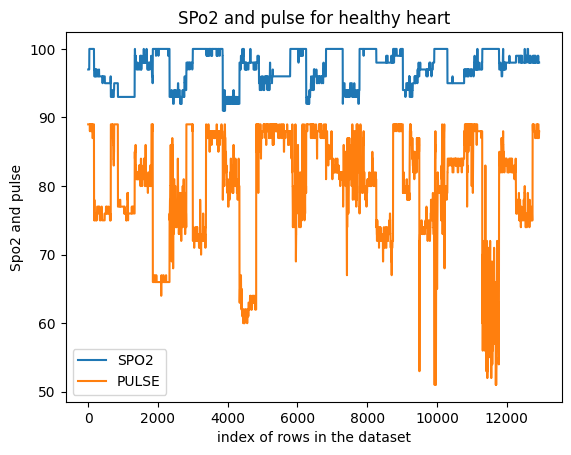

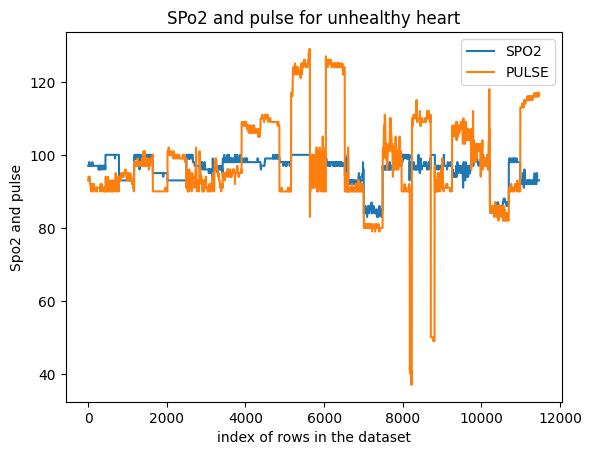

In [14]:
import matplotlib.pyplot as plt

# Assuming you have two features `x1` and `x2` and a list of y-indices
x1 = clean_data[" SpO2"]
x2 = clean_data[" PULSE"]
y = clean_data[" HEALTHY HEART"]

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

# Filter the features based on the target class
class_0_x1 = x1[y == 0]
class_0_x2 = x2[y == 0]
class_1_x1 = x1[y == 1]
class_1_x2 = x2[y == 1]

# Generate the y-indices
y_class_1_indices = range(len(class_1_x2))  # Assuming x1 and x2 have the same length

# Plot the features against the y-indices
plt.plot(y_class_1_indices, class_1_x1, label='SPO2')
plt.plot(y_class_1_indices, class_1_x2, label='PULSE')

# Add labels and title
plt.xlabel('index of rows in the dataset')
plt.ylabel('Spo2 and pulse')
plt.title('SPo2 and pulse for healthy heart')

# Add legend
plt.legend()

# Display the plot
plt.show()


y_class_0_indices = range(len(class_0_x2))  # Assuming x1 and x2 have the same length

# Plot the features against the y-indices
plt.plot(y_class_0_indices, class_0_x1, label='SPO2')
plt.plot(y_class_0_indices, class_0_x2, label='PULSE')

# Add labels and title
plt.xlabel('index of rows in the dataset')
plt.ylabel('Spo2 and pulse')
plt.title('SPo2 and pulse for unhealthy heart')

# Add legend
plt.legend()

# Display the plot
plt.show()